In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
df.isnull().values.any()

True

In [4]:
df.duplicated().any()

False

In [5]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [73]:
df["engine"].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [74]:
df["brand"].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [75]:
df["model_year"].unique()

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1974,
       1992], dtype=int64)

-----------Graph Plotting---------
--------------------------------checking Balanced or Imbalanced------------------
brand
Ford             12.246132
Mercedes-Benz    10.169042
BMW               9.031841
Chevrolet         8.664266
Audi              5.774586
Name: proportion, dtype: float64


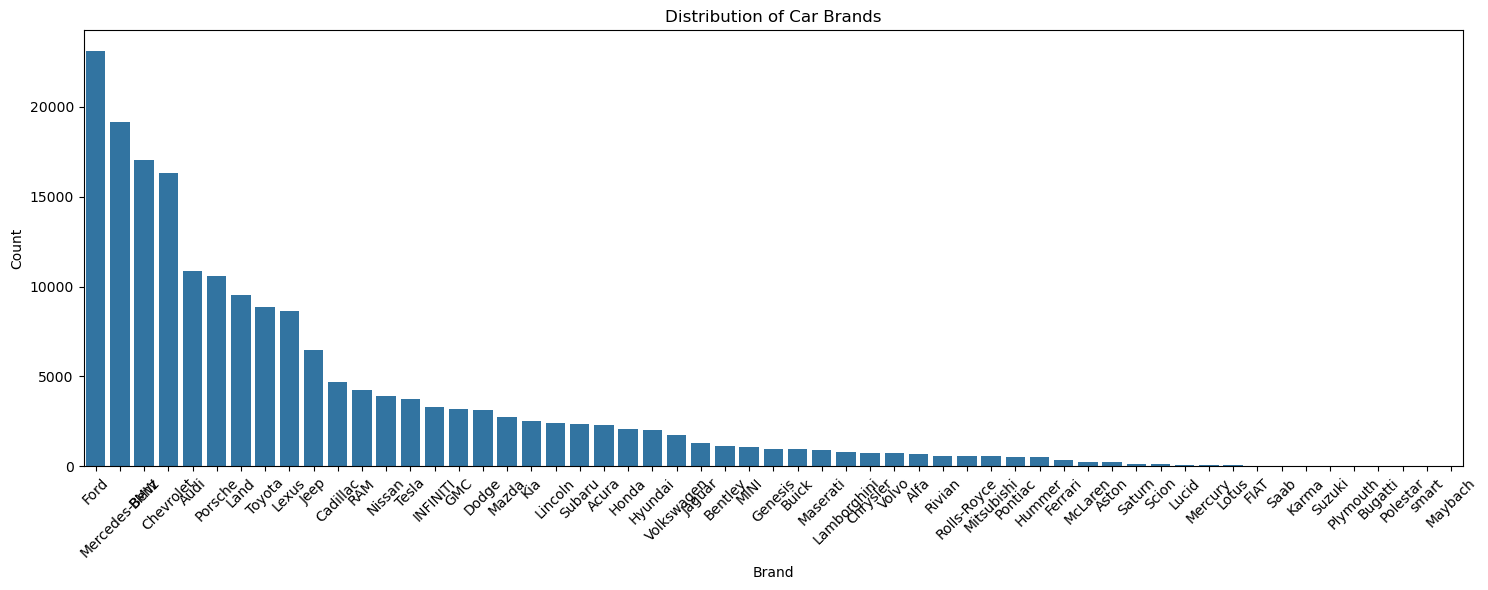

In [6]:
## FEATURE: brand
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

brand_counts = df['brand'].value_counts()

print("-----------Graph Plotting---------")
plt.figure(figsize=(15, 6))

sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('brand_distribution.png')

print("--------------------------------checking Balanced or Imbalanced------------------")

brand_percentages = df['brand'].value_counts(normalize=True)
brand_percentages = brand_percentages * 100
print(brand_percentages[:5])
#---------------------------------------------------------------------



In [7]:
## Feature: model
# 1. Calculate value counts for the 'model' column
model_counts = df['model'].value_counts()

print("--------------------------------checking Balanced or Imbalanced by calculating there percentages------------------")
model_percentages = df['model'].value_counts(normalize=True)
model_percentages = model_percentages * 100

# Print the top 5 models by percentage
print(model_percentages.head(5))
#---------------------------------------------------------------------
# feature.append('model')

--------------------------------checking Balanced or Imbalanced by calculating there percentages------------------
model
F-150 XLT             1.562061
M3 Base               1.182286
Camaro 2SS            0.906473
M4 Base               0.860327
Mustang GT Premium    0.809407
Name: proportion, dtype: float64


New columns created:
   horsepower  engine_size_L  cylinders fuel_type_from_engine
0       172.0            1.6        4.0              Gasoline
1       252.0            3.9        8.0              Gasoline
2       320.0            5.3        8.0                   NaN
3       420.0            5.0        8.0              Gasoline
4       208.0            2.0        4.0              Gasoline

-----------Horsepower Analysis---------

------------------------------------------- Fuel Type Percentages -------------------------------------------
fuel_type_from_engine
Gasoline    92.039863
Electric     4.983566
Diesel       2.713099
Hybrid       0.263472
Name: proportion, dtype: float64


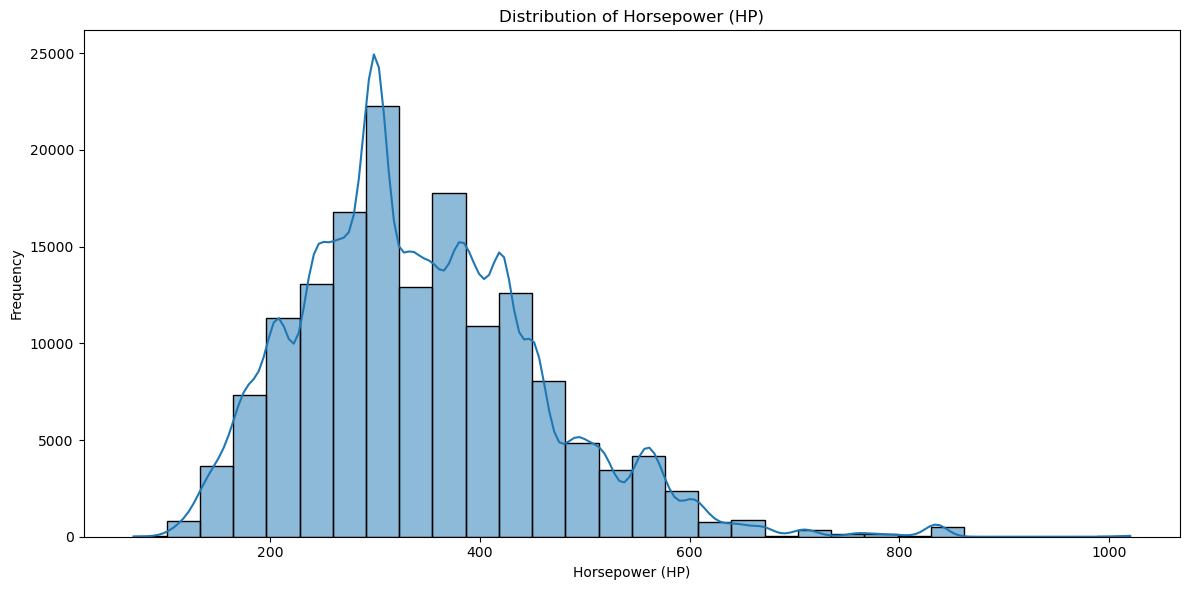

In [8]:
import pandas as pd
import numpy as np

# Assume 'df' is your DataFrame that is already loaded

# --- Feature Extraction ---

# Extract Horsepower (HP) - looking for a number before "HP"
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*HP').astype(float)

# Extract Engine Size (L) - looking for a number before "L"
df['engine_size_L'] = df['engine'].str.extract(r'(\d\.\d)\s*L').astype(float)

# Extract Cylinders - looking for a number before "Cylinder"
df['cylinders'] = df['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)

# Extract Fuel Type - looking for common fuel names
df['fuel_type_from_engine'] = df['engine'].str.extract(r'(Gasoline|Diesel|Hybrid|Electric)')

print("New columns created:")
print(df[['horsepower', 'engine_size_L', 'cylinders', 'fuel_type_from_engine']].head())

import seaborn as sns
import matplotlib.pyplot as plt

print("\n-----------Horsepower Analysis---------")

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['horsepower'], kde=True, bins=30)
plt.title('Distribution of Horsepower (HP)')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('horsepower_distribution.png')

print("\n------------------------------------------- Fuel Type Percentages -------------------------------------------")
print(df['fuel_type_from_engine'].value_counts(normalize=True) * 100)


-----------Graph Plotting---------
--------------------------------checking Balanced or Imbalanced------------------
model_year
2021    9.652422
2018    8.706168
2020    8.405955
2022    8.353445
2019    8.173105
Name: proportion, dtype: float64


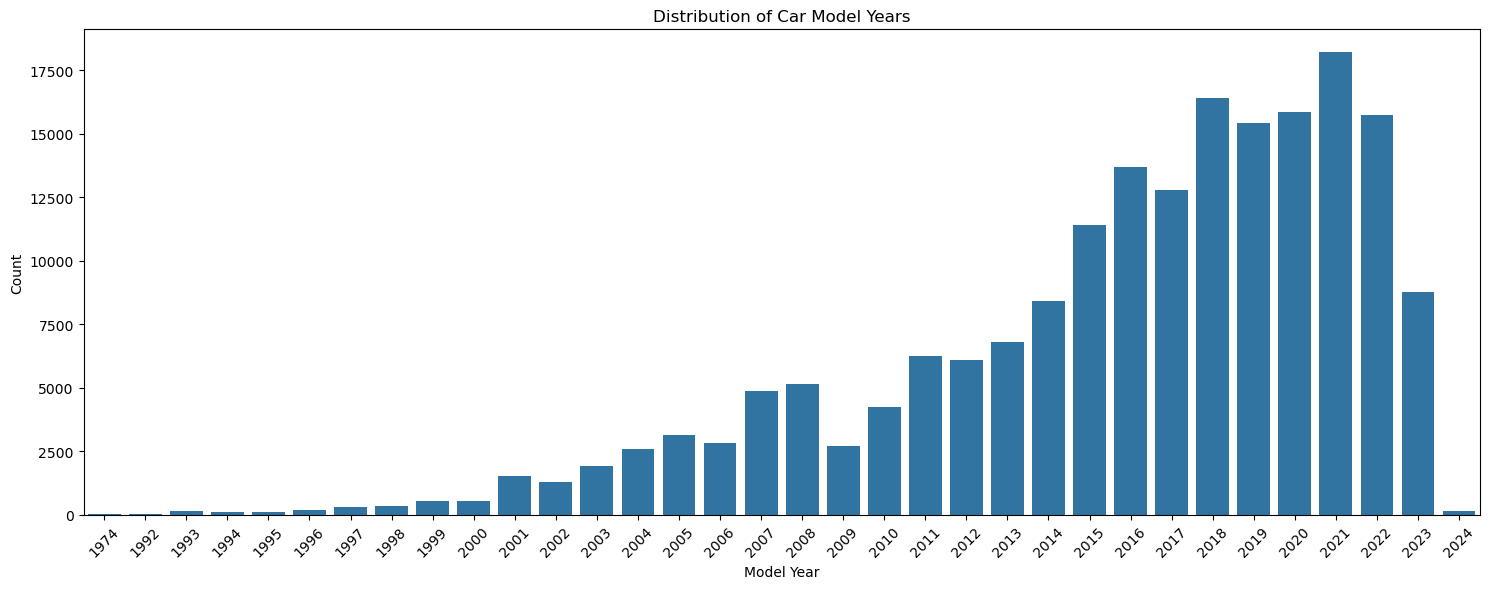

In [9]:
## Feature: model_year
# 1. Calculate value counts for the 'model_year' column
model_year_counts = df['model_year'].value_counts()

# 2. Plot the distribution of car model years
print("-----------Graph Plotting---------")
plt.figure(figsize=(15, 6))

sns.barplot(x=model_year_counts.index, y=model_year_counts.values)
plt.title('Distribution of Car Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_year_distribution.png')

# 3. Check for balance by calculating percentages
print("--------------------------------checking Balanced or Imbalanced------------------")
model_year_percentages = df['model_year'].value_counts(normalize=True)
model_year_percentages = model_year_percentages * 100

# Print the top 5 years by count and their percentages
print(model_year_percentages.head(5))
#---------------------------------------------------------------------


-----------Graph Plotting (Histogram)---------
-----------------------------------------------------------
--------------------------------Statistical Summary------------------
count    188533.000000
mean      65705.295174
std       49798.158076
min         100.000000
25%       24115.000000
50%       57785.000000
75%       95400.000000
max      405000.000000
Name: milage, dtype: float64


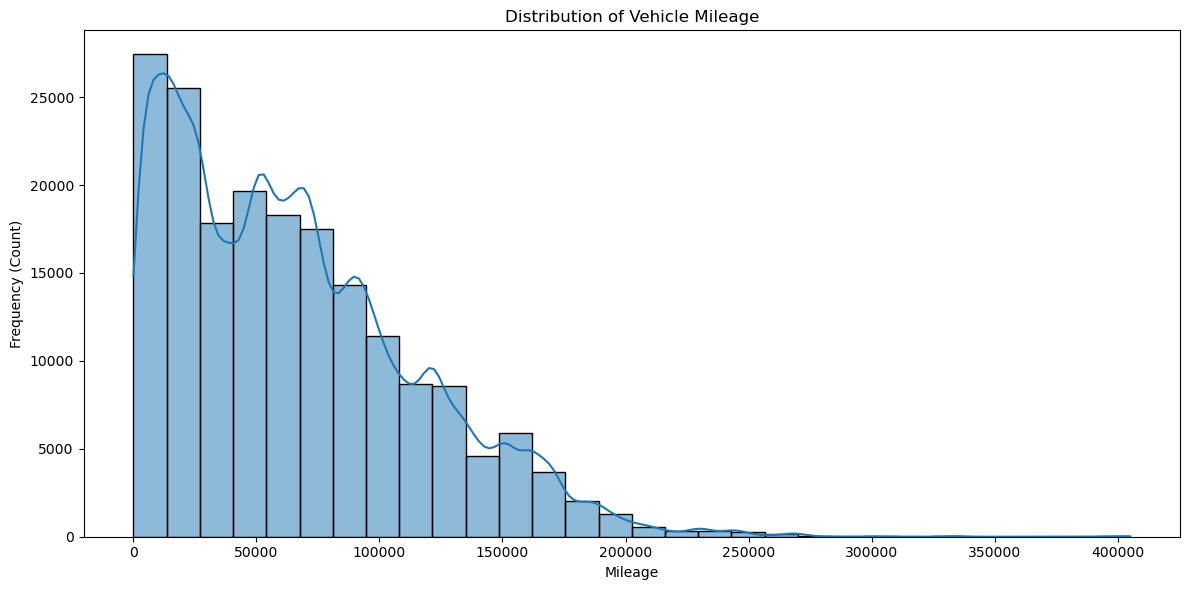

In [10]:
## FEATURE: milage

print("-----------Graph Plotting (Histogram)---------")
plt.figure(figsize=(12, 6))

# Use a histogram for numerical data
sns.histplot(df['milage'], kde=True, bins=30) # kde=True adds a smooth line

plt.title('Distribution of Vehicle Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency (Count)')
plt.tight_layout()
plt.savefig('mileage_distribution.png')

print("-----------------------------------------------------------")

print("--------------------------------Statistical Summary------------------")
mileage_summary = df['milage'].describe()
print(mileage_summary)
#---------------------------------------------------------------------


In [11]:
# FEATURE: 'fuel_type'
each = df['fuel_type'].value_counts()
total_value = df['fuel_type'].value_counts().sum()
null = df['fuel_type'].isnull().sum()

print(each)
print("--------------------")
print("NULL:",null)
print("Total Non-Null:", total_value)

# --- CORRECTED VERIFICATION ---
# The error is fixed by adding the integer totals together, not a Series and an integer.
total = total_value + null

# Now compare this single number against the DataFrame's total length.
if total == len(df):
    print("\nIt matches")
else:
    print("\nIt does not match")
    
print("----------------------------------------")
print(f"Percentage of Gasoloine:{165940*100/183450}")
print("---------can be Imbalanced Dataset---------")


fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64
--------------------
NULL: 5083
Total Non-Null: 183450

It matches
----------------------------------------
Percentage of Gasoloine:90.45516489506677
---------can be Imbalanced Dataset---------


In [12]:
print("As Gasoline itself is around 92%, so taking is becomes completely immbalance")

As Gasoline itself is around 92%, so taking is becomes completely immbalance


In [13]:
## Feature: Transmission
transmission_counts = df['transmission'].value_counts()

# 3. Check for balance by calculating percentages
print("--------------------------------checking Balanced or Imbalanced------------------")
transmission_percentages = df['transmission'].value_counts(normalize=True)
transmission_percentages = transmission_percentages * 100

print(transmission_percentages[:5])
#---------------------------------------------------------------------


--------------------------------checking Balanced or Imbalanced------------------
transmission
A/T                               26.469637
8-Speed A/T                       10.950338
Transmission w/Dual Shift Mode    10.213066
6-Speed A/T                        9.570738
6-Speed M/T                        6.363873
Name: proportion, dtype: float64


In [15]:
## FEATURE: ext_cooling (Exterior Color)

# 1. Calculate value counts for the 'ext_cooling' column
color_counts = df['ext_col'].value_counts()

print(color_counts.head(5))
#---------------------------------------------------------------------


ext_col
Black     48658
White     43815
Gray      25293
Silver    16995
Blue      14555
Name: count, dtype: int64


In [17]:
## FEATURE: int_col (Interior Color)

# 1. Calculate value counts for the 'int_col' column
int_col_counts = df['int_col'].value_counts()

# Print the top 10 interior colors by percentage
print(int_col_counts.head(5))
#---------------------------------------------------------------------


int_col
Black    107674
Beige     24495
Gray      21204
Brown      5810
Red        5145
Name: count, dtype: int64


In [18]:
## FEATURE: 'accident'
## Count of (NON-REPORTED) & (ATLEAST 1 ACCIDENT)

non_reported = (df['accident'] == "None reported").sum()

reported = (df['accident'] != "None reported").sum()

print(f"Non-Reported: {non_reported}")
print(f"Reported: {reported}")
percentage = reported/(reported+non_reported)
print(f"Percentage of Reported {percentage*100:.2f}%")

Non-Reported: 144514
Reported: 44019
Percentage of Reported 23.35%


In [19]:
## FEATURE: 'clean_title'
## Count of (Yes) & (_____)

print("Check yes",df['clean_title'].value_counts())

print("Shape:",df.shape)

print("NO:",188533-167114)

percentage = 21419/(167114 + 21419)
percentage = percentage * 100
print("Percentage:",percentage)

print("----------Immbalance Dataset------")
print("So, for now we won't consider this feature")

Check yes clean_title
Yes    167114
Name: count, dtype: int64
Shape: (188533, 17)
NO: 21419
Percentage: 11.360875814844086
----------Immbalance Dataset------
So, for now we won't consider this feature


In [20]:
# Your initial list of features
features = ['brand',
            'model_year',
            'milage',
            'transmission',
            'color_counts',
            'int_col',
            'ext_cooling']

# Use the .remove() method to take out the specific item
features.remove('color_counts')

# Print the list to see the result

## Scalling and plotting Graph for HYPERPARAMETERS

In [4]:
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
# df.head()
df["horsepower"].isnull().sum()
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,vehicle_age,milage_log,horsepower_log
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0,1,4200,172.0,17,12.269052,5.153292
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1,1,4999,252.0,22,11.872354,5.533389
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0,1,13900,320.0,22,11.825778,5.771441
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0,1,45000,420.0,7,9.878221,6.042633
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0,1,97500,208.0,3,8.907748,5.342334


In [ ]:
brand,model,model_year,milage,fuel_type,engine,transmission,ext_cool,int_cool,accident,clean_title,price

/tmp/ipykernel_6531/1849346306.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_correlation.values, y=price_correlation.index, palette='coolwarm')


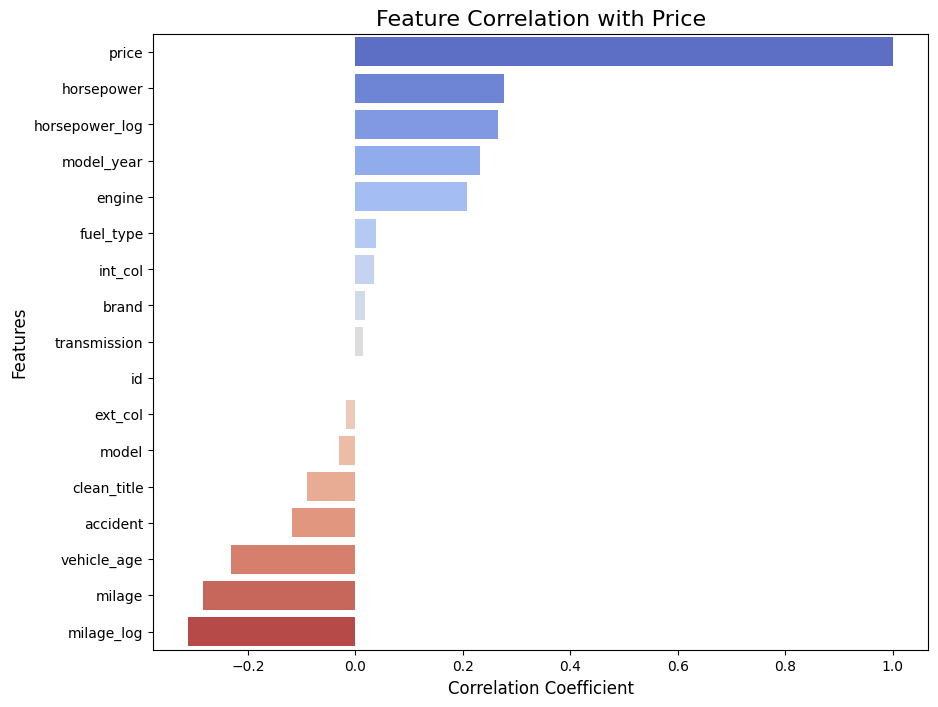


Correlation of each feature with Price:
price             1.000000
horsepower        0.276135
horsepower_log    0.264739
model_year        0.231795
engine            0.208285
fuel_type         0.038596
int_col           0.035174
brand             0.017657
transmission      0.014560
id               -0.000877
ext_col          -0.017342
model            -0.029865
clean_title      -0.089433
accident         -0.118315
vehicle_age      -0.231795
milage           -0.283067
milage_log       -0.310735
Name: price, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding to keep the original data intact
df_encoded = df.copy()

# 2. Convert Categorical Columns to Numerical using Label Encoding
# We will loop through each column. If the column is of 'object' type (text),
# we will apply the LabelEncoder.
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])

# 3. Calculate the Correlation Matrix
# The .corr() method computes the pairwise correlation of columns
correlation_matrix = df_encoded.corr()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)
#------------------------------------------------------------------------------------------------
#plotting graph

plt.figure(figsize=(10, 8))
sns.barplot(x=price_correlation.values, y=price_correlation.index, palette='coolwarm')
plt.title('Feature Correlation with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# Display the sorted correlation values as a table
print("\nCorrelation of each feature with Price:")
print(price_correlation)

In [23]:
print("Other than Price the one which has high value is taken as a hyperparameter")

Other than Price the one which has high value is taken as a hyperparameter


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Extract numerical features from the 'engine' string
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*HP').astype(float)
df['engine_size_L'] = df['engine'].str.extract(r'(\d\.\d)\s*L').astype(float)
df['cylinders'] = df['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)

# Convert binary text columns to numbers
df['accident'] = df['accident'].apply(lambda x: 0 if x == 'None reported' else 1)
df['clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)


# 2. Define Features (X) and Target (y) based on your new list
y = df['price']
X = df[[
    'horsepower', 'model_year', 'cylinders', 'accident',
    'engine_size_L', 'clean_title', 'fuel_type', 'int_col',
    'brand', 'transmission', 'milage'  # Re-including milage for better performance
]]

# Define the updated lists of column types for the pipeline
numerical_cols = [
    "horsepower", "model_year", "cylinders",
    "accident", "engine_size_L", "clean_title", "milage"
]
categorical_cols = [
    "fuel_type", "int_col", "brand", "transmission"
]

# 3. Create the preprocessing pipelines
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# Combine pipelines with a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numerical_cols),
        ("cat", cat_pipe, categorical_cols)
    ],
    remainder="drop"
)


In [26]:
# 4. Create the final model pipeline
final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1))
])

# 5. Split data, train the model, and make predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training the model with the new feature set...")
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
print("Model training and prediction complete.")

# 6. Calculate and display performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance Metrics ---")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

Training the model with the new feature set...
Model training and prediction complete.

--- Model Performance Metrics ---
Mean Squared Error (MSE): 4,684,348,719.45
Root Mean Squared Error (RMSE): $68,442.30
R-squared (R²): 0.1577


In [40]:
# --- Create the XGBoost Pipeline ---
# The only change is replacing the regressor
import xgboost as xgb  # Import XGBoost

xgb_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", xgb.XGBRegressor(n_estimators=50, random_state=42, learning_rate=0.1))
])

# --- Split, Train, and Evaluate ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training the XGBoost model...")
xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)
print("Model training and prediction complete.")

# --- Performance Metrics ---
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- XGBoost Model Performance ---")
print(f"Mean Squared Error (MSE): {mse_xgb:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_xgb:,.2f}")
print(f"R-squared (R²): {r2_xgb:.4f}")

Training the XGBoost model...
Model training and prediction complete.

--- XGBoost Model Performance ---
Mean Squared Error (MSE): 4,684,250,112.00
Root Mean Squared Error (RMSE): $68,441.58
R-squared (R²): 0.1577


In [28]:
from catboost import CatBoostRegressor
# 4. Split data before training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create the final CatBoost model pipeline
#    NOTE: We are using the SAME 'preprocessor' as the Gradient Boosting model.
#    We remove `cat_features` because the one-hot encoder handles the categorical data now.
catboost_pipe_fixed = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", CatBoostRegressor(n_estimators=600,     # Increased from the default 100
        depth=8,              # Increased from the default 
        learning_rate=0.03,   # A good starting point for a smaller learning rate
        random_state=42,
        verbose=0))
])

# 6. Train the CatBoost model and make predictions
print("Training the corrected CatBoost model...")
catboost_pipe_fixed.fit(X_train, y_train)
y_pred_cat = catboost_pipe_fixed.predict(X_test)`
print("Model training and prediction complete.")

# 7. Calculate and display performance metrics
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = mse_cat ** 0.5
r2_cat = r2_score(y_test, y_pred_cat)

print("\n--- CatBoost Model Performance ---")
print(f"Mean Squared Error (MSE): {mse_cat:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_cat:,.2f}")
print(f"R-squared (R²): {r2_cat:.4f}")

Training the corrected CatBoost model...
Model training and prediction complete.

--- CatBoost Model Performance ---
Mean Squared Error (MSE): 4,662,206,108.18
Root Mean Squared Error (RMSE): $68,280.35
R-squared (R²): 0.1616


In [9]:
import lightgbm as lgb # Import the LightGBM library
# 4. Split data before training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create the final LightGBM model pipeline
lgbm_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", lgb.LGBMRegressor(random_state=42)) # Use the LightGBM Regressor
])

# 6. Train the LightGBM model and make predictions
print("Training the LightGBM model...")
lgbm_pipe.fit(X_train, y_train)
y_pred_lgbm = lgbm_pipe.predict(X_test)
print("Model training and prediction complete.")

# 7. Calculate and display performance metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = mse_lgbm ** 0.5
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("\n--- LightGBM Model Performance ---")
print(f"Mean Squared Error (MSE): {mse_lgbm:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_lgbm:,.2f}")
print(f"R-squared (R²): {r2_lgbm:.4f}")

Training the LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 206
[LightGBM] [Info] Start training from score 43890.785316
Model training and prediction complete.

--- LightGBM Model Performance ---
Mean Squared Error (MSE): 4,618,863,937.25
Root Mean Squared Error (RMSE): $67,962.22
R-squared (R²): 0.1694


/home/user/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [41]:
# Create the final model pipeline
# This connects the preprocessing steps with the machine learning model.
final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the entire pipeline on the training data
print("Training the model with the selected features...")
final_pipe.fit(X_train, y_train)

# Make predictions on the unseen test data
y_pred = final_pipe.predict(X_test)
print("Model training and prediction complete.")

# Calculate and display the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance Metrics ---")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

Training the model with the selected features...
Model training and prediction complete.

--- Model Performance Metrics ---
Mean Squared Error (MSE): 4,684,348,719.45
Root Mean Squared Error (RMSE): $68,442.30
R-squared (R²): 0.1577


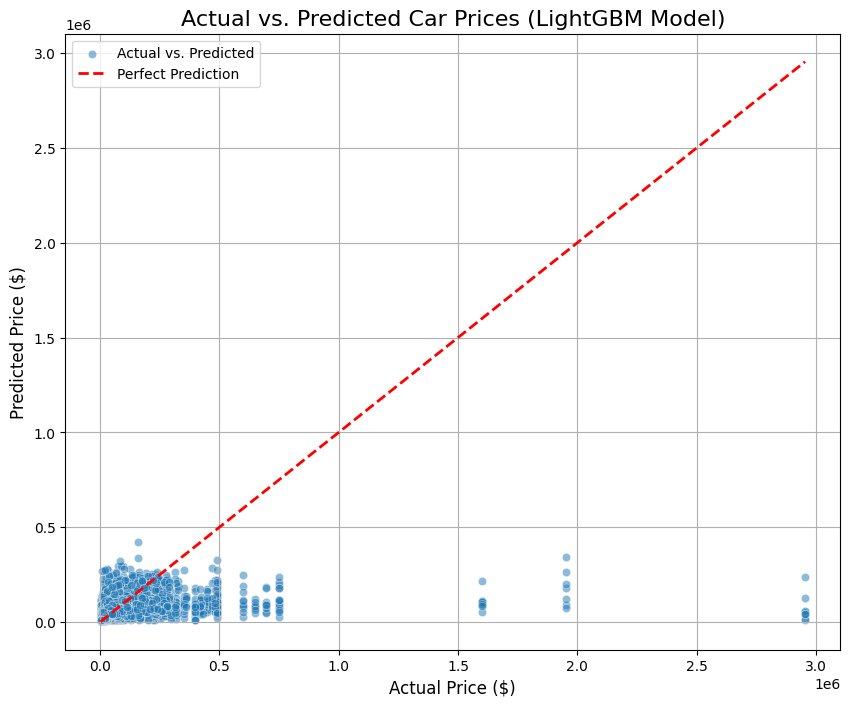

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Visualization: Actual vs. Predicted Prices with Legend ---
# We'll use the predictions from the LightGBM model (y_pred_lgbm).

plt.figure(figsize=(10, 8))

# Create a scatter plot of the actual vs. predicted prices.
# Add the 'label' argument to identify these points in the legend.
sns.scatterplot(x=y_test, y=y_pred_lgbm, alpha=0.5, label='Actual vs. Predicted')

# Add a diagonal line representing a perfect prediction.
# Add the 'label' argument for the legend here as well.
min_val = min(y_test.min(), y_pred_lgbm.min())
max_val = max(y_test.max(), y_pred_lgbm.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and a title for clarity
plt.title('Actual vs. Predicted Car Prices (LightGBM Model)', fontsize=16)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.grid(True)

# Display the legend
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import lightgbm as lgb # You may need to import necessary libraries again in a new session

# --- Generate Predictions for Submission ---

# 1. Load the test dataset
#    IMPORTANT: Make sure you have uploaded 'test.csv' to your environment.
try:
    test_df = pd.read_csv('test.csv')
except FileNotFoundError:
    print("Error: 'test.csv' not found. Please upload the test dataset to proceed.")
    test_df = pd.DataFrame() # Create an empty DataFrame to avoid errors if the file is not found

if not test_df.empty:
    # 2. Create a feature set from the test data for prediction.
    #    This must match the features the model was trained on.
    X_submission = test_df.copy()

    # --- Feature Engineering for Test Data (Must be identical to training) ---
    # The model expects these engineered features to be present.
    X_submission['horsepower'] = test_df['engine'].str.extract(r'(\d+\.?\d*)\s*HP').astype(float)
    X_submission['engine_size_L'] = test_df['engine'].str.extract(r'(\d\.\d)\s*L').astype(float)
    X_submission['cylinders'] = test_df['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)
    X_submission['accident'] = test_df['accident'].apply(lambda x: 0 if x == 'None reported' else 1)
    X_submission['clean_title'] = test_df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

    # 3. Use the trained LightGBM pipeline to make predictions.
    #    The pipeline will automatically handle preprocessing (scaling, encoding, etc.).
    print("Generating predictions on the test data...")
    test_predictions = lgbm_pipe.predict(X_submission)
    print("Predictions generated successfully.")

    # 4. Create the submission DataFrame in the required format.
    submission_df = pd.DataFrame({
        'id': test_df['id'],
        'price': test_predictions
    })

    # 5. Save the DataFrame to a CSV file named 'submission.csv'.
    submission_df.to_csv('submission.csv', index=False)

    print("\n'submission.csv' file has been created.")
    print("Here is a preview of the submission file:")
    print(submission_df.head())

## Testing by hyperparameter tunning

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

# --- 1. Load and Engineer Features ---
df = pd.read_csv("train.csv")
y = df['price']

# Basic feature engineering
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*HP').astype(float)
df['accident'] = df['accident'].apply(lambda x: 0 if x == 'None reported' else 1)
df['clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

# Advanced feature engineering
df['vehicle_age'] = 2024 - df['model_year']
df['milage_log'] = np.log1p(df['milage']) # Use log of milage
df['horsepower_log'] = np.log1p(df['horsepower']) # Use log of horsepower

# Use the log of the target variable
y_log = np.log1p(y)

# Define feature set X with new features
X = df[['horsepower_log', 'vehicle_age', 'accident', 'clean_title', 'fuel_type', 'int_col', 'brand', 'transmission', 'milage_log']]

# --- 2. Redefine Preprocessing Pipeline ---
numerical_cols = ["horsepower_log", "vehicle_age", "accident", "clean_title", "milage_log"]
categorical_cols = ["fuel_type", "int_col", "brand", "transmission"]

# The preprocessor remains the same but uses the new columns
num_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))])

preprocessor = ColumnTransformer(
    transformers=[("num", num_pipe, numerical_cols), ("cat", cat_pipe, categorical_cols)],
    remainder="drop"
)

# --- 3. Build and Train the Final Tuned Model ---
# Use the best parameters found from RandomizedSearchCV (example parameters shown)
final_lgbm_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", lgb.LGBMRegressor(
        subsample=0.9,
        num_leaves=50,
        n_estimators=1000,
        max_depth=20,
        learning_rate=0.05,
        colsample_bytree=0.9,
        random_state=42
    ))
])

# Split data
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the final pipeline
print("Training the final tuned LightGBM model...")
final_lgbm_pipe.fit(X_train, y_log_train)
print("Training complete.")

# --- 4. Evaluate the Final Model ---
y_log_pred = final_lgbm_pipe.predict(X_test)

# IMPORTANT: Transform predictions and test set back to the original scale
y_pred_final = np.expm1(y_log_pred)
y_test_final = np.expm1(y_log_test)

# Calculate final metrics
mse_final = mean_squared_error(y_test_final, y_pred_final)
rmse_final = mse_final ** 0.5
r2_final = r2_score(y_test_final, y_pred_final)

print("\n--- Final Tuned Model Performance ---")
print(f"Mean Squared Error (MSE): {mse_final:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_final:,.2f}")
print(f"R-squared (R²): {r2_final:.4f}") # You should see a significant improvement here!

Training the final tuned LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 206
[LightGBM] [Info] Start training from score 10.291542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training complete.


/home/user/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



--- Final Tuned Model Performance ---
Mean Squared Error (MSE): 4,746,490,115.57
Root Mean Squared Error (RMSE): $68,894.78
R-squared (R²): 0.1465
